Import relevant stuff.

In [46]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import qgrid

Indicate where raw data is saved. 

In [25]:
base_dir = "//cbsu/data/Imaging/hauk/users/fm02/EOS_data/EOS_data_fromLab/"

Specify participants ID.

In [3]:
participants = [
        101, 
        102, 
        103, 
        104, 
        105,
        106,
        107,
        108,
        109,
        110,
        111,
        112,
        113,
        114,
        115,
        116,
        117,
        118,
        119,
        120,
        121,
        122,
        123,
        124,
        125,
        126,
        127,
        128,
        129,
        130,
        131,
        132,
        133,
        134,
        135,
        136,
        137,
        138,
#        139 # excluded - not completed testing
        140,
        141
        ]

Import all preprocessed data.
Prefix nrgr indicate that only trials without regression, while wrgr includes all trials.

normalised data contain prefix norm.

In [4]:
with open("U:/AnEyeOnSemantics/41analysis/nrgr_dur_all.P", 'rb') as f:
      ALL_nrgr_ffd = pickle.load(f)
nrgrdur_all = list(ALL_nrgr_ffd.values())

In [5]:
with open("U:/AnEyeOnSemantics/41analysis/wrgr_dur_all.P", 'rb') as f:
      ALL_wrgr_ffd = pickle.load(f)
wrgrdur_all = list(ALL_wrgr_ffd.values())

In [6]:
with open("U:/AnEyeOnSemantics/41analysis/nrgr_ffd_all.P", 'rb') as f:
      ALL_nrgr_ffd = pickle.load(f)
nrgrffd_all = list(ALL_nrgr_ffd.values())

In [7]:
with open("U:/AnEyeOnSemantics/41analysis/wrgr_ffd_all.P", 'rb') as f:
      ALL_wrgr_ffd = pickle.load(f)
wrgrffd_all = list(ALL_wrgr_ffd.values())

In [8]:
with open("U:/AnEyeOnSemantics/41analysis/nrgr_gd_all.P", 'rb') as f:
      ALL_nrgr_gd = pickle.load(f)
nrgrgd_all = list(ALL_nrgr_gd.values())

In [9]:
with open("U:/AnEyeOnSemantics/41analysis/wrgr_gd_all.P", 'rb') as f:
      ALL_wrgr_gd = pickle.load(f)
wrgrgd_all = list(ALL_wrgr_gd.values())

In [10]:
with open("U:/AnEyeOnSemantics/41analysis/norm_nrgr_ffd_all.P", 'rb') as f:
      ALL_norm_nrgr_ffd = pickle.load(f)
norm_nrgrffd_all = list(ALL_norm_nrgr_ffd.values())

In [11]:
with open("U:/AnEyeOnSemantics/41analysis/norm_wrgr_ffd_all.P", 'rb') as f:
      ALL_norm_wrgr_ffd = pickle.load(f)
norm_wrgrffd_all = list(ALL_norm_wrgr_ffd.values())

In [12]:
with open("U:/AnEyeOnSemantics/41analysis/norm_nrgr_gd_all.P", 'rb') as f:
      ALL_norm_nrgr_gd = pickle.load(f)
norm_nrgrgd_all = list(ALL_norm_nrgr_gd.values())

In [13]:
with open("U:/AnEyeOnSemantics/41analysis/norm_wrgr_gd_all.P", 'rb') as f:
      ALL_norm_wrgr_gd = pickle.load(f)
norm_wrgrgd_all = list(ALL_norm_wrgr_gd.values())     

Initialised series for descriptors.
They will all be included in a dataframe for easier visualisation


In [14]:
wrgr_n_blinks = pd.Series(np.zeros(len(wrgrdur_all),dtype=int))
wrgr_n_regressions = pd.Series(np.zeros(len(wrgrdur_all),dtype=int))

wrgr_n_trials_excluded = pd.Series(np.zeros(len(wrgrffd_all)))
wrgr_n_skipped_fp = pd.Series(np.zeros(len(wrgrffd_all),dtype=int))
wrgr_fixated_p = pd.Series(np.zeros(len(wrgrffd_all),dtype=int))
wrgr_n_goodtrials = pd.Series(np.zeros(len(wrgrffd_all),dtype=int))
wrgr_avg_ffd = pd.Series(np.zeros(len(wrgrffd_all)))
wrgr_avg_gd = pd.Series(np.zeros(len(wrgrgd_all)))

For each participant, save total number of regressions and blinks.

In [15]:
for p,participant in enumerate(wrgrdur_all):
    for trial in participant:
        if type(trial)==str:
            if trial == "Nope - there was regression":
                wrgr_n_regressions[p] += 1
            elif trial == "There was a blink":
                wrgr_n_blinks[p] += 1

For each participant, save the number of trials that were excluded, the namber of trials where the target word was skipped on first pass, the percentage of trials that were kept for the analysis, and the FFD.

In [16]:
for p,participant in enumerate(wrgrffd_all):
    wrgr_n_trials_excluded[p] = len(wrgrdur_all[p]) - len(wrgrffd_all[p])
    wrgr_n_skipped_fp[p] = len(participant[participant['ms']==0])
    wrgr_fixated_p[p] =  len(participant[participant['ms']>0])/len(wrgrdur_all[p])*100
    wrgr_n_goodtrials[p] = participant['ms'][participant['ms']>0].count()/4
    wrgr_avg_ffd[p] = np.mean(participant['ms'][participant['ms']!=0])                

Now save average GD.

In [17]:
for p,participant in enumerate(wrgrgd_all):
    wrgr_avg_gd[p] = np.mean(participant['ms'][participant['ms']!=0])

Create long form for plotting purposes.

In [18]:
for i,df, in enumerate(wrgrffd_all):
    wrgrffd_all[i]['Subject'] = [i]*len(wrgrffd_all[i])
wrgrffd_all_long = pd.concat(wrgrffd_all)    

Plot FFD and GD boxplot for each participant.

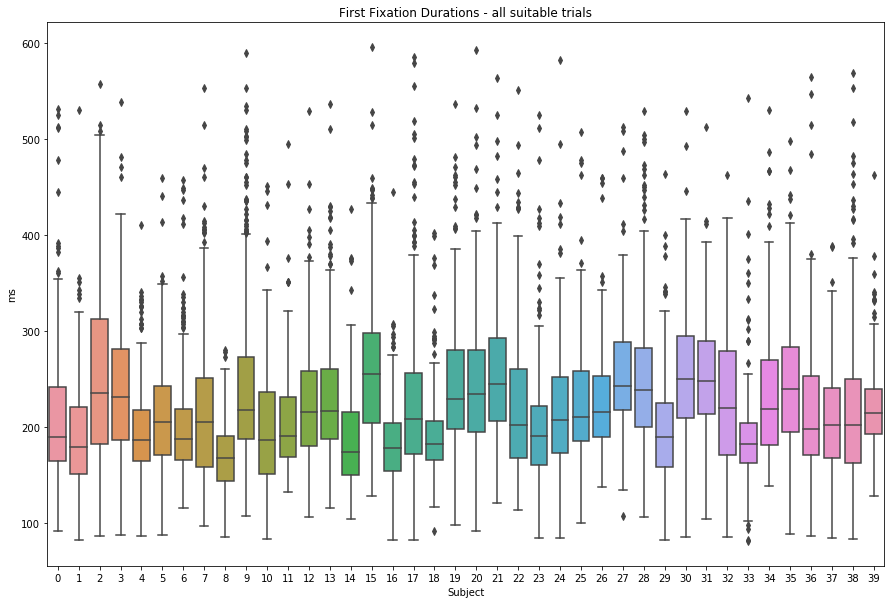

In [20]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="Subject", y="ms", data=wrgrffd_all_long[wrgrffd_all_long['ms']!=0])
plt.title('First Fixation Durations - all suitable trials'); 

In [21]:
for i,df, in enumerate(wrgrgd_all):
    wrgrgd_all[i]['Subject'] = [i]*len(wrgrgd_all[i])
wrgrgd_all_long = pd.concat(wrgrgd_all)

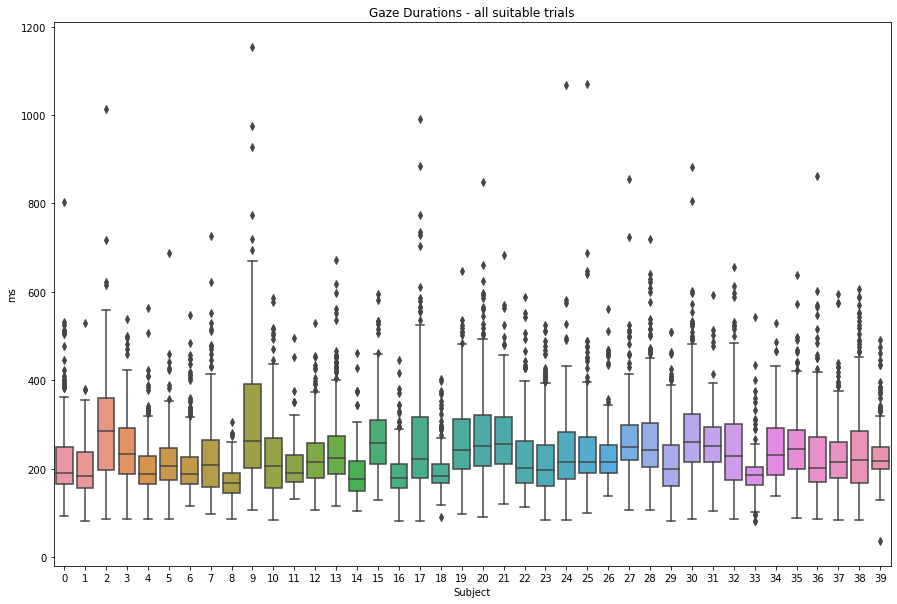

In [22]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="Subject", y="ms", data=wrgrgd_all_long[wrgrgd_all_long['ms']!=0])
plt.title('Gaze Durations - all suitable trials');
plt.show()

In [26]:
performance_answer = pd.Series(np.zeros(len(nrgrdur_all)))

for i,p in enumerate(participants):
    answers = pd.read_csv((f"{base_dir}{p}/{p}.txt"),
                            sep='\t',
                            header=0,
                            encoding='ANSI',
                            usecols=['Answer'])
    performance_answer[i] = len(answers[answers['Answer']=='Correct'])/40*100
 

In [27]:
description_wrgr = pd.concat([wrgr_n_blinks.astype(int),
                            wrgr_n_trials_excluded.astype(int),
                            wrgr_n_skipped_fp.astype(int),
                            wrgr_fixated_p.round(2),
                            wrgr_n_goodtrials,
                            wrgr_avg_ffd.round(2),
                            wrgr_avg_gd.round(2),
                            performance_answer
                           ], axis=1)
description_wrgr.columns = ['n_blinks',
                       'n_trials_excluded',
                       'n_skipped_firstpass',
                       'percentage_fixated', 
                       'percentage_trials_kept',
                       'avg_ffd',
                       'avg_gd',
                       'comprehension']

In [47]:
widget = qgrid.show_grid(description_wrgr)
widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [29]:
description_wrgr.sort_values(by='percentage_trials_kept')

,n_blinks,n_trials_excluded,n_skipped_firstpass,percentage_fixated,percentage_trials_kept,avg_ffd,avg_gd,comprehension
14,9,9,274,29,29,190.48,194.56,92.5
3,0,0,248,38,38,241.12,246.47,90.0
34,4,4,226,42,42,238.34,248.74,92.5
33,0,0,230,42,42,189.69,190.62,95.0
36,17,17,177,51,51,214.84,233.16,92.5
11,1,1,192,51,51,204.35,204.35,87.5
12,3,3,189,52,52,226.15,229.05,97.5
31,11,11,163,56,56,254.78,259.51,95.0
18,1,1,164,58,58,191.58,194.60,95.0
37,55,55,105,60,60,206.42,229.29,90.0


In [30]:
description_wrgr.describe().round(2)

,n_blinks,n_trials_excluded,n_skipped_firstpass,percentage_fixated,percentage_trials_kept,avg_ffd,avg_gd,comprehension
count,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00
mean,6.60,7.60,118.25,68.08,68.08,220.97,235.81,94.81
std,10.21,10.71,59.76,14.56,14.56,24.60,31.38,3.94
min,0.00,0.00,25.00,29.00,29.00,168.15,168.60,85.00
25%,0.00,1.00,69.75,60.00,60.00,200.14,215.55,92.50
50%,3.50,4.00,111.50,70.50,70.50,220.39,232.26,95.00
75%,8.00,8.25,145.75,78.00,78.00,244.85,260.55,97.50
max,55.00,55.00,274.00,92.00,92.00,264.13,307.36,100.00


In [31]:
n_regressions = pd.Series(np.zeros(len(nrgrdur_all),dtype=int))
n_blinks = pd.Series(np.zeros(len(nrgrdur_all),dtype=int))

In [32]:
n_trials_excluded = pd.Series(np.zeros(len(nrgrffd_all)))
n_skipped_fp = pd.Series(np.zeros(len(nrgrffd_all),dtype=int))
percentage_good = pd.Series(np.zeros(len(nrgrffd_all),dtype=int))
avg_ffd = pd.Series(np.zeros(len(nrgrffd_all)))
avg_gd = pd.Series(np.zeros(len(nrgrgd_all)))
n_fixatedfirstpass  = pd.Series(np.zeros(len(nrgrffd_all),dtype=int))

In [33]:
for p,participant in enumerate(nrgrdur_all):
    for trial in participant:
        if type(trial)==str:
            if trial == "Nope - there was regression":
                n_regressions[p] += 1
            elif trial == "There was a blink":
                n_blinks[p] += 1

In [34]:
for p,participant in enumerate(nrgrffd_all):
    n_trials_excluded[p] = len(nrgrdur_all[p]) - len(nrgrffd_all[p])
    n_skipped_fp[p] = len(participant[participant['ms']==0])
    # a trial is good if in ffd, and if ms>0 (means that's included in lmer)
    percentage_good[p] = participant['ms'][participant['ms']>0].count()/400*100
    avg_ffd[p] = np.mean(participant['ms'][participant['ms']!=0])

In [35]:
for p,participant in enumerate(nrgrgd_all):
    avg_gd[p] = np.mean(participant['ms'][participant['ms']!=0])

In [36]:
for i,df, in enumerate(nrgrffd_all):
    nrgrffd_all[i]['Subject'] = [i]*len(nrgrffd_all[i])
nrgrffd_all_long = pd.concat(nrgrffd_all)

In [37]:
description = pd.concat([n_regressions.astype(int),
                            n_blinks.astype(int),
                            n_trials_excluded.astype(int),
                            n_skipped_fp.astype(int),
                            percentage_good.round(2),
                            avg_ffd.round(2),
                            avg_gd.round(2),
                            performance_answer
                           ], axis=1)
description.columns = ['n_regressions',
                       'n_blinks',
                       'n_trials_excluded',
                       'n_skipped_firstpass',
                       'percentage_trials_kept',
                       'avg_ffd',
                       'avg_gd',
                       'comprehension']

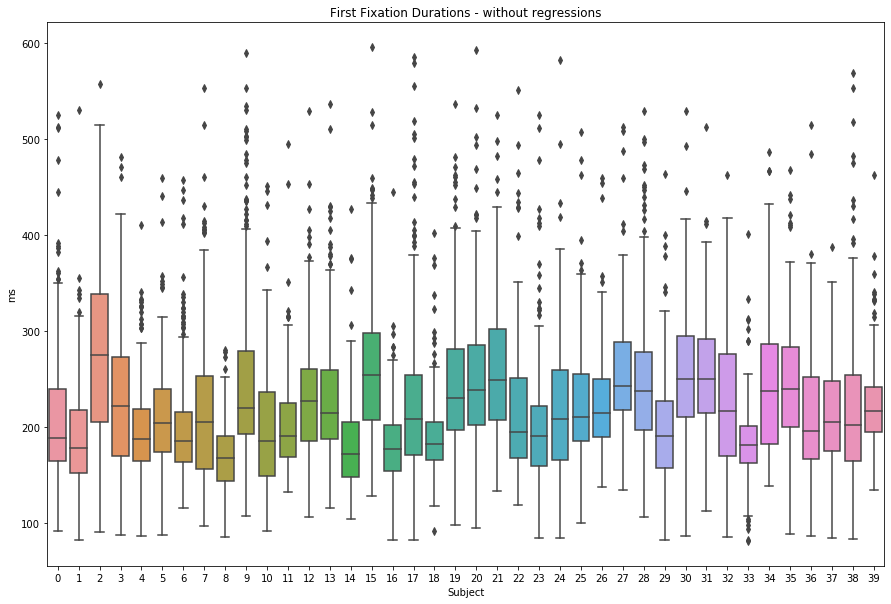

In [38]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="Subject", y="ms", data=nrgrffd_all_long[nrgrffd_all_long['ms']!=0])
plt.title('First Fixation Durations - without regressions');
plt.show()

In [40]:

for i,df, in enumerate(nrgrgd_all):
    nrgrgd_all[i]['Subject'] = [i]*len(nrgrgd_all[i])
nrgrgd_all_long = pd.concat(nrgrgd_all)

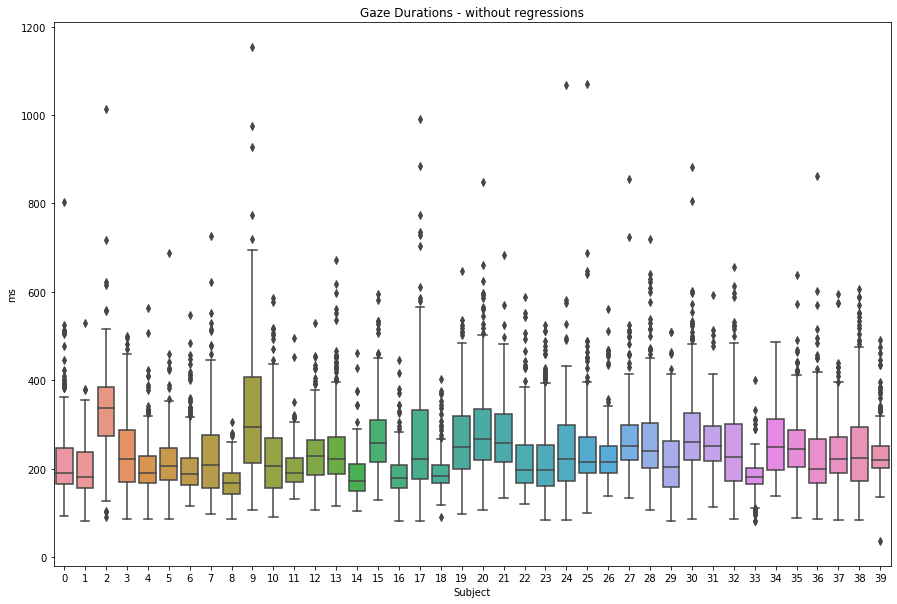

In [41]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="Subject", y="ms", data=nrgrgd_all_long[nrgrgd_all_long['ms']!=0])
plt.title('Gaze Durations - without regressions');
plt.show()

In [42]:
description.sort_values(by='percentage_trials_kept')

,n_regressions,n_blinks,n_trials_excluded,n_skipped_firstpass,percentage_trials_kept,avg_ffd,avg_gd,comprehension
3,50,0,50,248,25,230.78,238.76,90.0
14,7,9,16,274,27,186.00,190.34,92.5
12,89,2,91,189,30,236.53,241.55,97.5
34,46,3,49,226,31,246.54,260.68,92.5
33,20,0,20,230,37,182.65,183.70,95.0
36,34,14,48,177,43,209.41,230.97,92.5
31,30,10,40,163,49,256.64,262.06,95.0
11,11,1,12,191,49,201.51,201.51,87.5
37,49,47,96,104,50,209.82,237.28,90.0
7,56,2,58,135,51,219.32,235.29,95.0


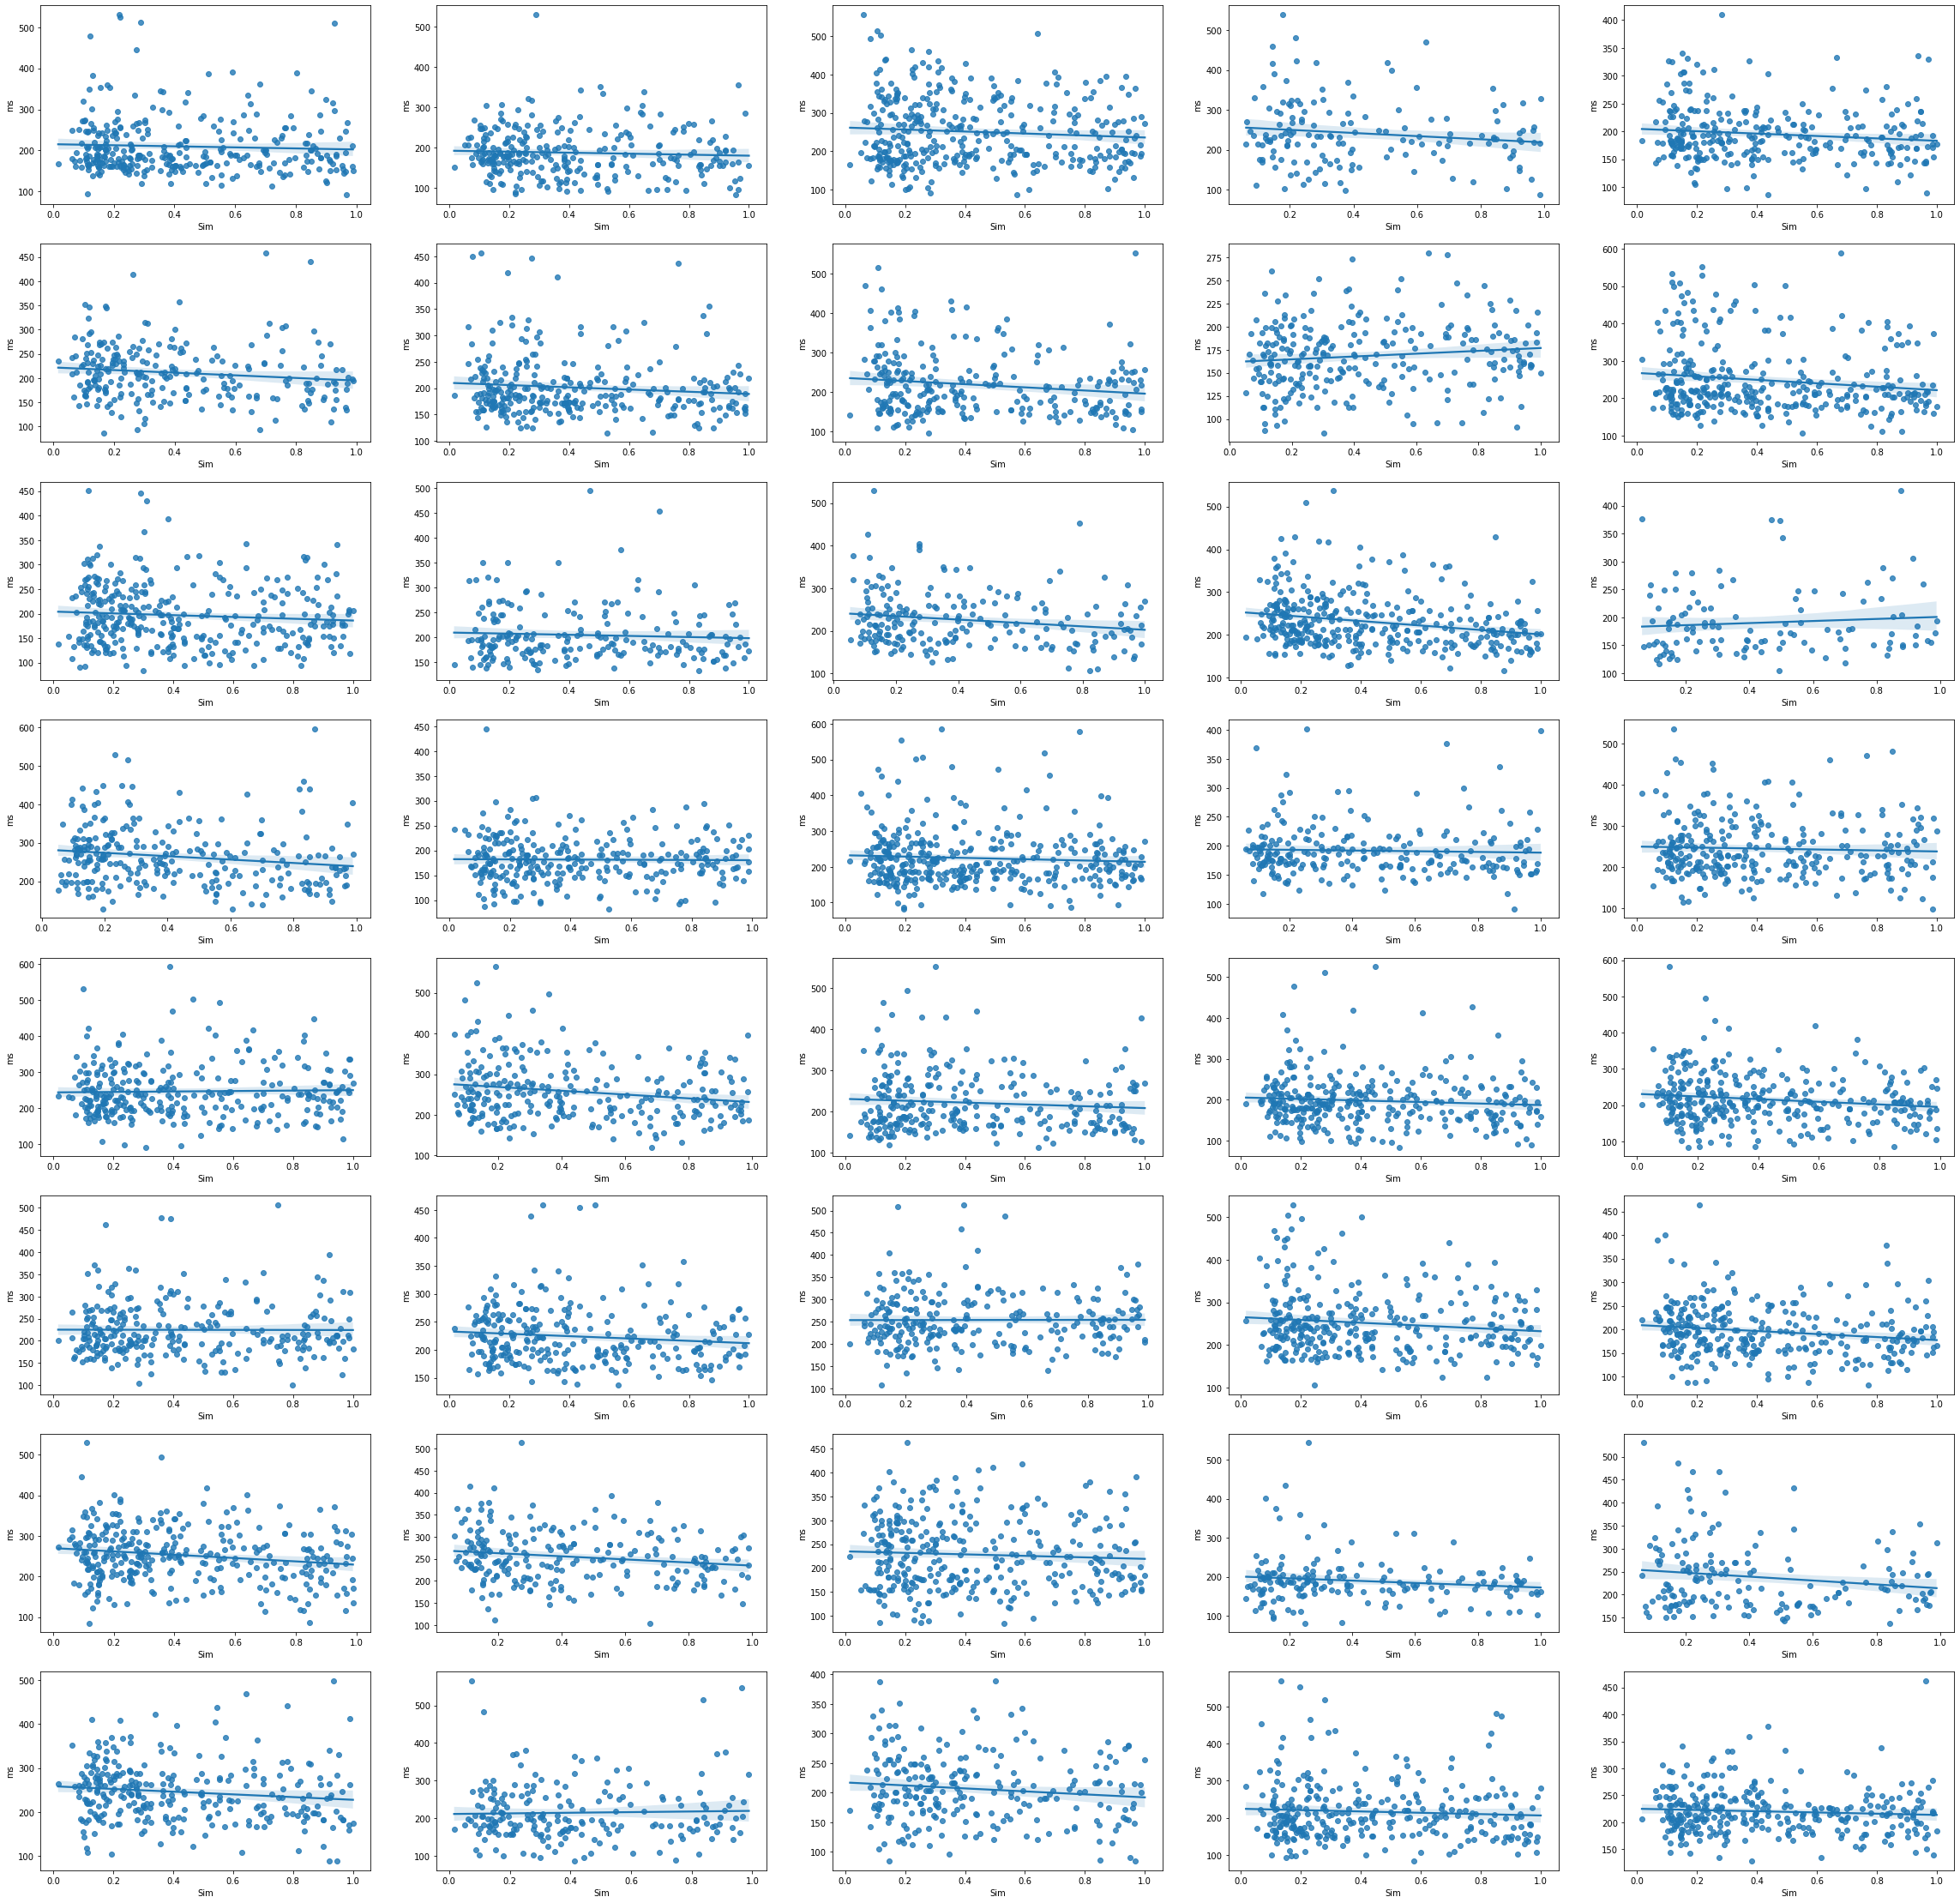

In [43]:
f, axes = plt.subplots(8, 5, figsize=(40,40))

for i in range(len(wrgrffd_all)):
    sns.regplot(data = wrgrffd_all_long[(wrgrffd_all_long['Subject']==i) & (wrgrffd_all_long['ms']>0)],
                x = 'Sim',
                y = 'ms',
                ax = axes[i//5,i%5])
    

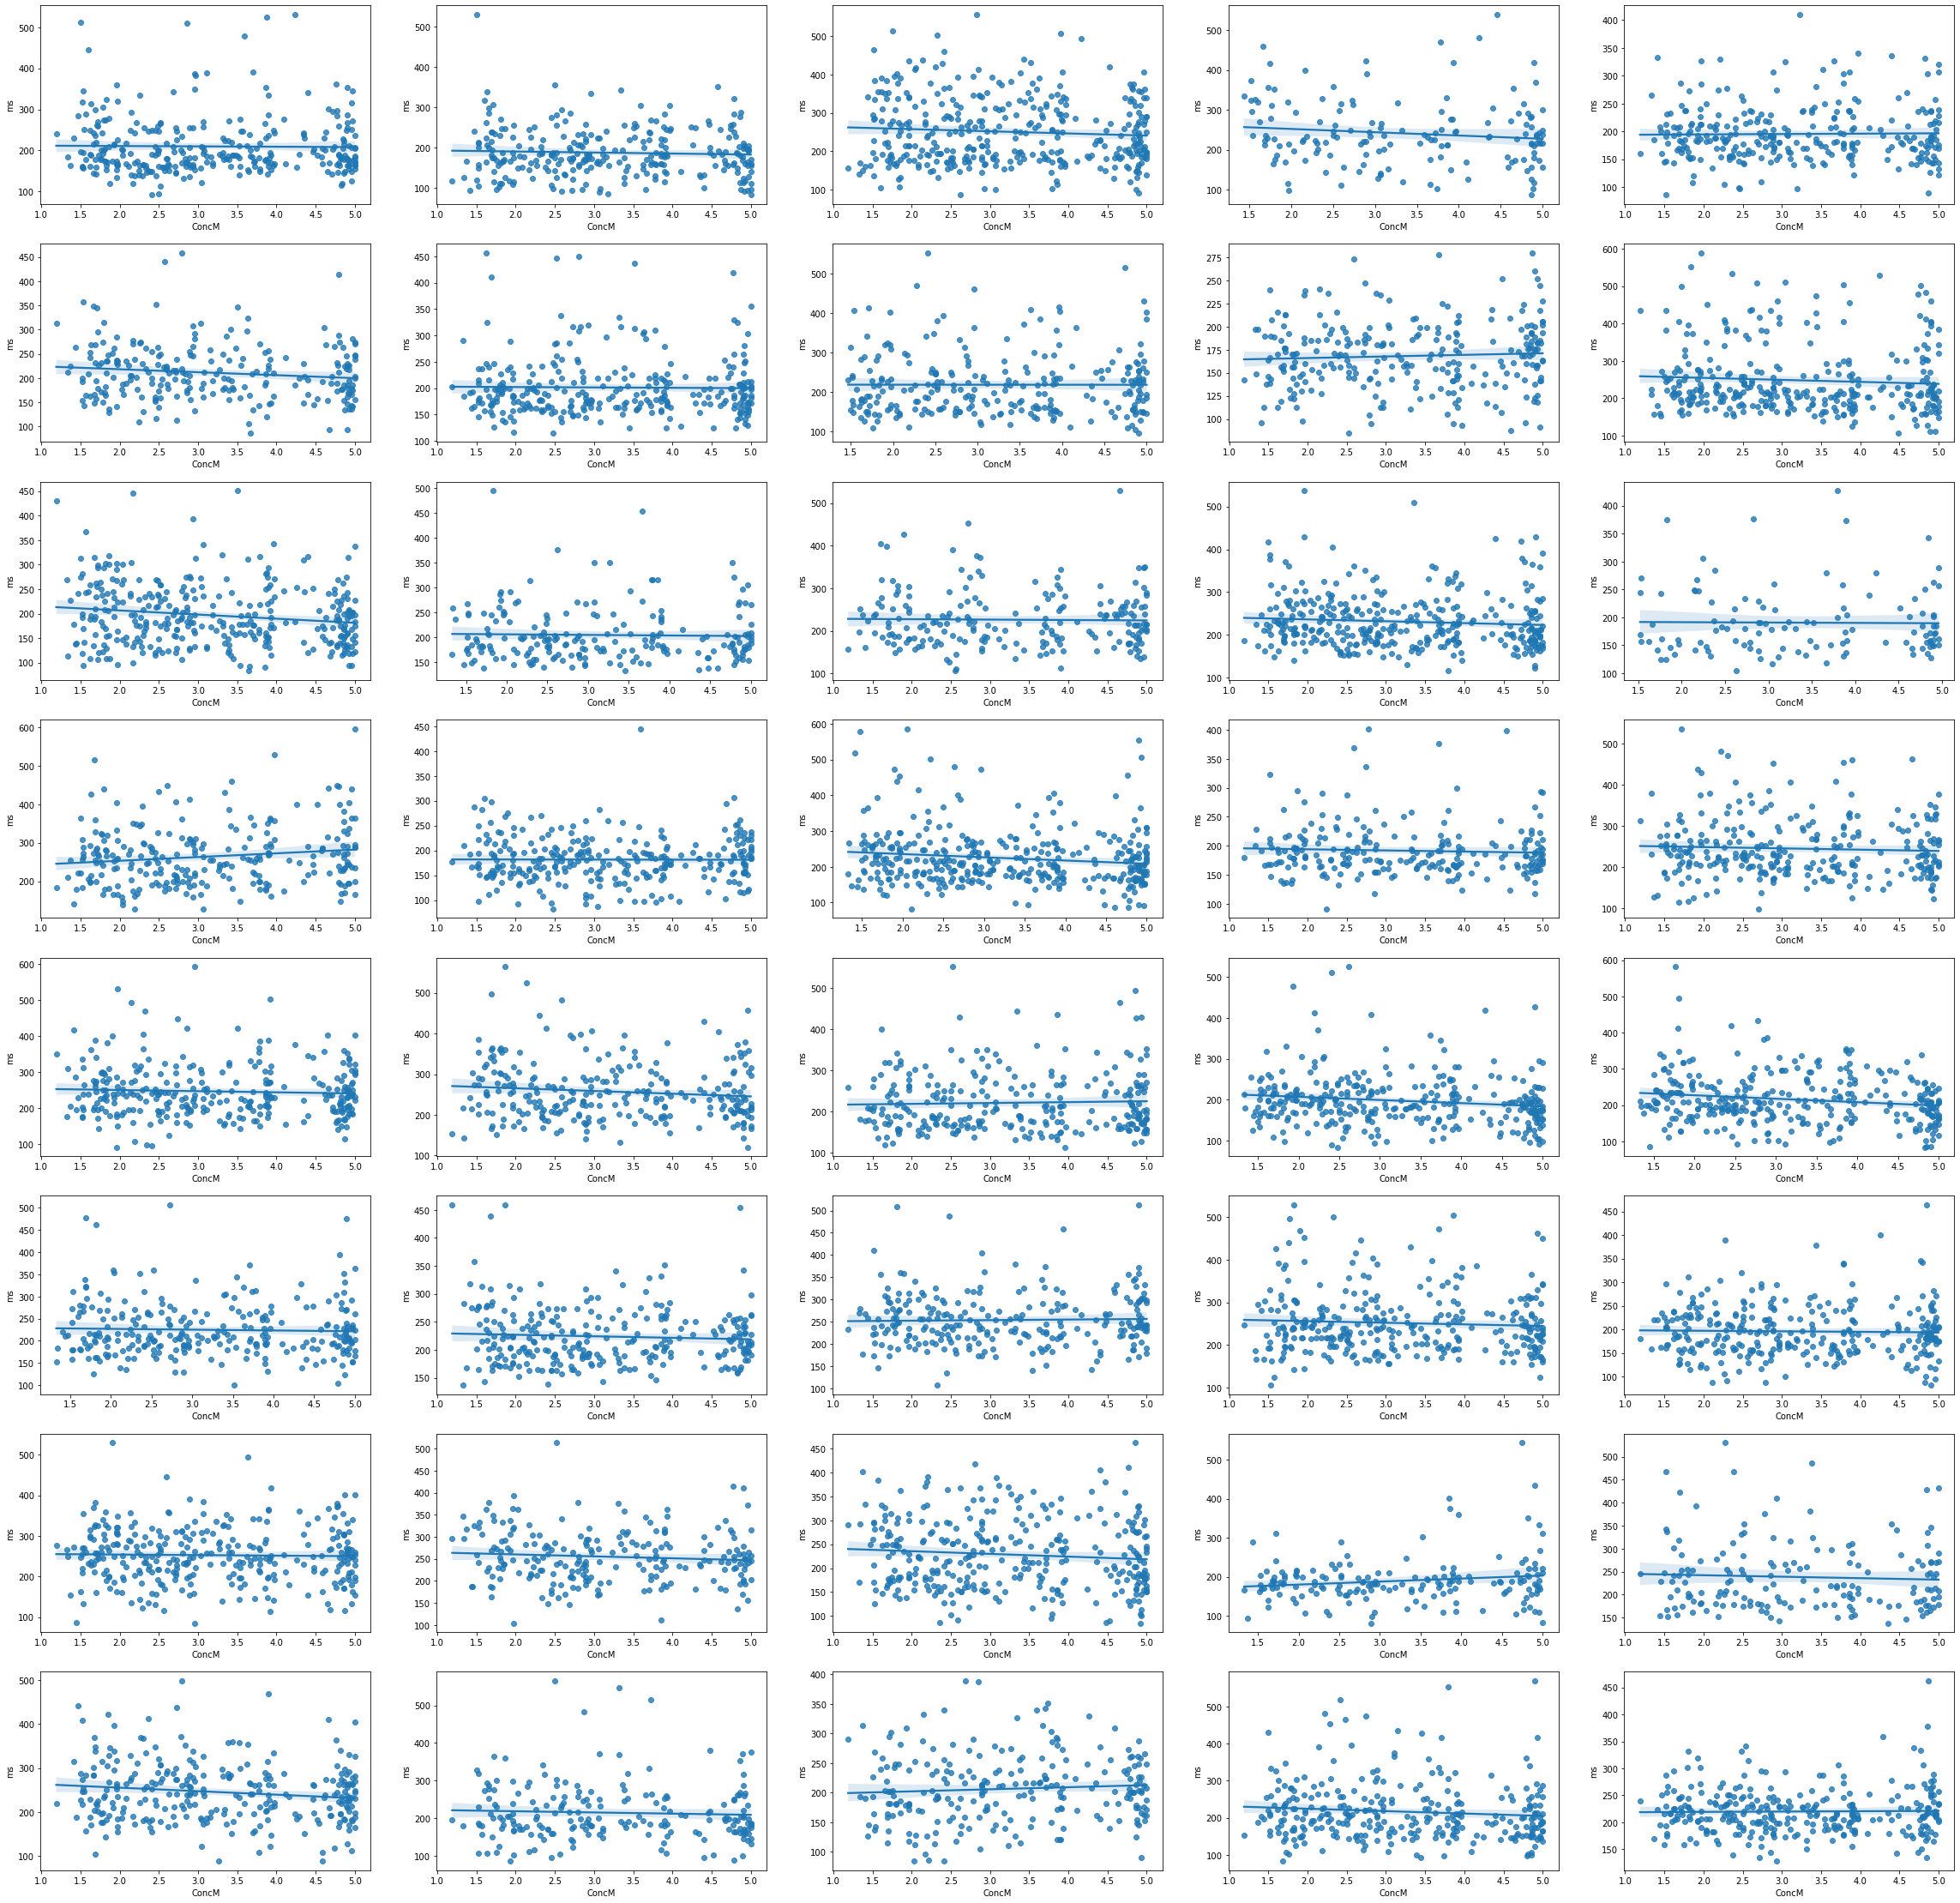

In [44]:
    
f, axes = plt.subplots(8, 5, figsize=(40,40))

for i in range(len(wrgrffd_all)):
    sns.regplot(data = wrgrffd_all_long[(wrgrffd_all_long['Subject']==i) & (wrgrffd_all_long['ms']>0)],
                x = 'ConcM',
                y = 'ms',
                ax = axes[i//5,i%5])    